In [1]:
import numpy as np
import pandas as pd
import pyreadr
import scipy

In [2]:
perfomances_dt4 = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/perfomances_dt4.rds")[None] # also works for RData
# Get base level L and create L_pct reduction (% reduction with baselevel)
# baselevel_n = perfomances_dt5[(perfomances_dt5['NMS'] == '1') & (perfomances_dt5['policy'] == 'fee_0')]['L'].to_numpy()[0]
# perfomances_dt5['L_pct_red'] = (1-(perfomances_dt5['L']/baselevel_n))*100
# Get base level P and create P_dlt (change in P with baselevel)
baselevel_p = perfomances_dt4[(perfomances_dt4['NMS'] == 'static') & (perfomances_dt4['policy'] == 'fee_0')]['P'].to_numpy()[0]
perfomances_dt4['P_dlt'] = perfomances_dt4['P']-baselevel_p
# CalcGetulate base level Y_corn and create Y_corn_pct (% change with baselevel)
baselevel_y = perfomances_dt4[(perfomances_dt4['NMS'] == 'static') & (perfomances_dt4['policy'] == 'fee_0')]['Y_corn'].to_numpy()[0]
perfomances_dt4['Y_corn_pct'] = perfomances_dt4['Y_corn']/baselevel_y

# #Keep change in Y >= 95%
perfomances_dt4 = perfomances_dt4[perfomances_dt4['Y_corn_pct'] >= 0.95]
perfomances_dt4 = perfomances_dt4[perfomances_dt4['Y_corn_pct'] <= 1.05]

# #Calculate ag-sector cost
perfomances_dt4['C'] = - perfomances_dt4['P_dlt'] - perfomances_dt4['G']
# perfomances_dt4['L_change'] = -perfomances_dt4['L_change']
perfomances_dt4[perfomances_dt4['policy_name'] == 'ratio']


,policy,NMS,Y_corn,L,N_fert,P,G,L_change,policy_val,policy_name,net_balance,P_dlt,Y_corn_pct,C
0,ratio_5,dynamic1,12737.348922,39.088832,175.500976,1660.378166,0.000000,-8.1,5.0,ratio,-2.216042,-2.216042,0.992668,2.216042
1,ratio_6,dynamic1,12677.811653,37.499009,168.770063,1633.126779,23.627809,-11.8,6.0,ratio,-5.839620,-29.467429,0.988028,5.839620
2,ratio_7,dynamic1,12620.014276,36.337218,163.563590,1606.509680,45.797805,-14.5,7.0,ratio,-10.286722,-56.084527,0.983524,10.286722
3,ratio_8,dynamic1,12553.920010,35.153134,158.185452,1580.381095,66.437890,-17.3,8.0,ratio,-15.775223,-82.213113,0.978373,15.775223
4,ratio_9,dynamic1,12493.398105,34.324402,154.103618,1554.905176,86.298026,-19.3,9.0,ratio,-21.391006,-107.689032,0.973656,21.391006
5,ratio_10,dynamic1,12446.867887,33.678112,150.975063,1531.196416,105.682544,-20.8,10.0,ratio,-25.715247,-131.397791,0.970030,25.715247
6,ratio_11,dynamic1,12385.105553,32.997520,147.267856,1507.122279,123.704999,-22.4,11.0,ratio,-31.766930,-155.471929,0.965217,31.766930
7,ratio_12,dynamic1,12308.704988,32.318927,143.279371,1482.509356,140.413783,-24.0,12.0,ratio,-39.671069,-180.084852,0.959263,39.671069
8,ratio_13,dynamic1,12239.659634,31.792912,139.898475,1458.937125,156.686292,-25.2,13.0,ratio,-46.970791,-203.657083,0.953882,46.970791
51,ratio_5,static,12831.423188,42.516646,191.150055,1662.594208,0.000000,0.0,5.0,ratio,0.000000,0.000000,1.000000,-0.000000


In [3]:
perfomances_dt4['L_change'] = -perfomances_dt4['L_change']
# perfomances_dt4 = perfomances_dt4[perfomances_dt4['L_change'] >= 0]
perfomances_dt4 = perfomances_dt4.sort_values(by=['policy_val'])
ratio_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'ratio') & (perfomances_dt4['NMS'] == 'static')]
fee_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'fee') & (perfomances_dt4['NMS'] == 'static')]
nred_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'nred') & (perfomances_dt4['NMS'] == 'static')]
target_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'target') & (perfomances_dt4['NMS'] == 'static')]
#shadow_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'shadow') & (perfomances_dt4['NMS'] == 'static')]

ratio_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'ratio') & (perfomances_dt4['NMS'] == 'dynamic1')]
fee_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'fee') & (perfomances_dt4['NMS'] == 'dynamic1')]
nred_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'nred') & (perfomances_dt4['NMS'] == 'dynamic1')]
target_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'target') & (perfomances_dt4['NMS'] == 'dynamic1')]
# subs_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'subs') & (perfomances_dt4['NMS'] == 'dynamic1')]
#shadow_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'shadow') & (perfomances_dt4['NMS'] == 'dynamic1')]

perfomances_dt4[perfomances_dt4['policy_name'] == 'fee']
target_2_dt

,policy,NMS,Y_corn,L,N_fert,P,G,L_change,policy_val,policy_name,net_balance,P_dlt,Y_corn_pct,C
20,target_0.85,dynamic1,12218.923009,31.941043,140.072254,1612.598644,0.0,24.9,0.85,target,-49.995564,-49.995564,0.952266,49.995564
21,target_0.88,dynamic1,12351.013820,32.723819,145.693985,1627.156146,0.0,23.0,0.88,target,-35.438062,-35.438062,0.962560,35.438062
22,target_0.9,dynamic1,12418.955375,33.209420,148.865473,1634.447921,0.0,21.9,0.90,target,-28.146287,-28.146287,0.967855,28.146287
23,target_0.91,dynamic1,12447.295989,33.439233,150.309244,1637.404968,0.0,21.4,0.91,target,-25.189240,-25.189240,0.970064,25.189240
24,target_0.92,dynamic1,12471.849720,33.662811,151.677890,1639.884438,0.0,20.8,0.92,target,-22.709770,-22.709770,0.971977,22.709770
25,target_0.93,dynamic1,12497.266154,33.903714,153.126159,1642.428950,0.0,20.3,0.93,target,-20.165257,-20.165257,0.973958,20.165257
26,target_0.94,dynamic1,12519.982928,34.165085,154.607314,1644.572490,0.0,19.6,0.94,target,-18.021718,-18.021718,0.975728,18.021718
27,target_0.95,dynamic1,12537.466657,34.412939,155.930265,1646.094146,0.0,19.1,0.95,target,-16.500062,-16.500062,0.977091,16.500062
28,target_0.96,dynamic1,12558.116207,34.698734,157.443718,1647.925666,0.0,18.4,0.96,target,-14.668541,-14.668541,0.978700,14.668541
29,target_0.97,dynamic1,12570.592142,34.917881,158.524470,1648.915771,0.0,17.9,0.97,target,-13.678437,-13.678437,0.979672,13.678437


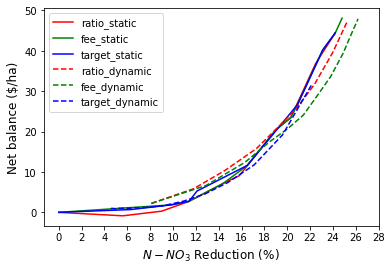

In [10]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig, ax = plt.subplots()
ax.plot(ratio_1_dt['L_change'], ratio_1_dt['C'], color = 'r', label = 'ratio_static')
ax.plot(fee_1_dt['L_change'], fee_1_dt['C'], color = 'g', label = 'fee_static')
ax.plot(nred_1_dt['L_change'], nred_1_dt['C'], color = 'b', label = 'target_static')
#ax.plot(target_1_dt['L_change'], target_1_dt['C'], color = 'y', label = 'target_NMS1')

ax.plot(ratio_2_dt['L_change'], ratio_2_dt['C'], linestyle='dashed', color = 'r',  label = 'ratio_dynamic')
ax.plot(fee_2_dt['L_change'], fee_2_dt['C'], linestyle='dashed', color = 'g', label = 'fee_dynamic')
ax.plot(nred_2_dt['L_change'], nred_2_dt['C'], linestyle='dashed', color = 'b', label = 'target_dynamic')
#ax.plot(target_2_dt['L_change'], target_2_dt['C'], linestyle='dashed', color = 'y', label = 'target_NMS2')

plt.legend()

plt.xlabel("$N-NO_3$ Reduction (%)", size = 12)
plt.ylabel("Net balance ($/ha)", size = 12)
ax.set_xticks((np.arange(0, 30, 2)))
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/net_balance.pdf"
plt.savefig(plot_file_name, dpi=300)